In [1]:
import pickle
#with open("2_0_0_analysisdata/2_0_0mpi_run_results30.pkl","rb")as f:
with open("2_0_0_analysisdata/2_0_0mpi_run_results30_005to0.pkl","rb")as f:
    results = pickle.load(f)
size=30

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
%%time
arr = np.asarray([r[0] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_params = np.asarray([r[1] for r in results ]).reshape( int(len(results)**0.5),-1,4)
arr_thres1 = np.asarray([r[1][0] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_thres2 = np.asarray([r[1][1] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_vol1 = np.asarray([r[1][2] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_vol2 = np.asarray([r[1][3] for r in results ]).reshape( int(len(results)**0.5),-1) 

CPU times: total: 594 ms
Wall time: 1.14 s


Text(0.5, 0, 'threshold2')

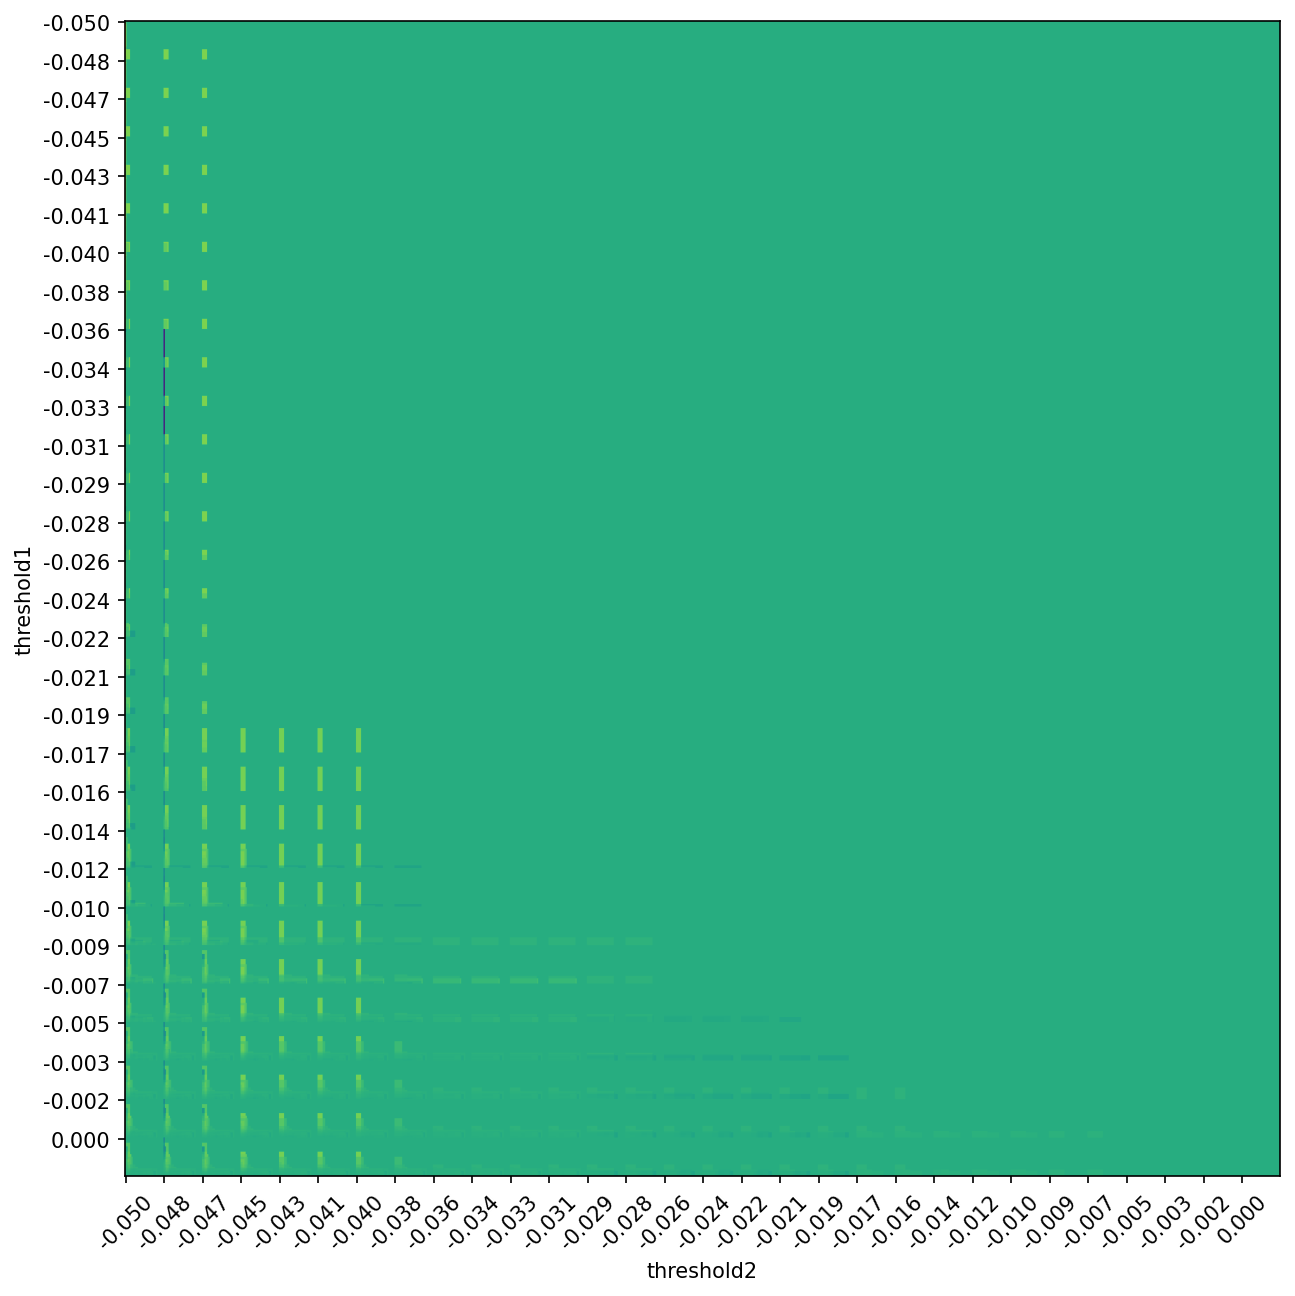

In [4]:
fig,ax=plt.subplots(dpi=150,figsize=(10,10))
ax.imshow(arr,interpolation=None)
ax.set_yticks(np.arange(0,900,30));
yvals = sorted(set(arr_params[:,:,0].reshape(-1)))
ax.set_yticklabels([f"{y:.3f}" for y in yvals]);
ax.set_ylabel("threshold1")
ax.set_xticks(np.arange(0,900,30));
xvals = sorted(set(arr_params[:,:,1].reshape(-1)))
ax.set_xticklabels([f"{x:.3f}" for x in xvals],rotation=45);
ax.set_xlabel("threshold2")

In [5]:
%%time
size=30
arr_params = np.asarray([r[1] for r in results ]).reshape( size,size,size,size,4)
arr_params2 = np.transpose(arr_params,axes=(2,3,0,1,-1))
#arr_params = np.asarray([r[1] for r in results ]).reshape( int(len(results)**0.5),-1,4)

CPU times: total: 250 ms
Wall time: 477 ms


In [6]:
arr_params.shape,arr_params2.shape

((30, 30, 30, 30, 4), (30, 30, 30, 30, 4))

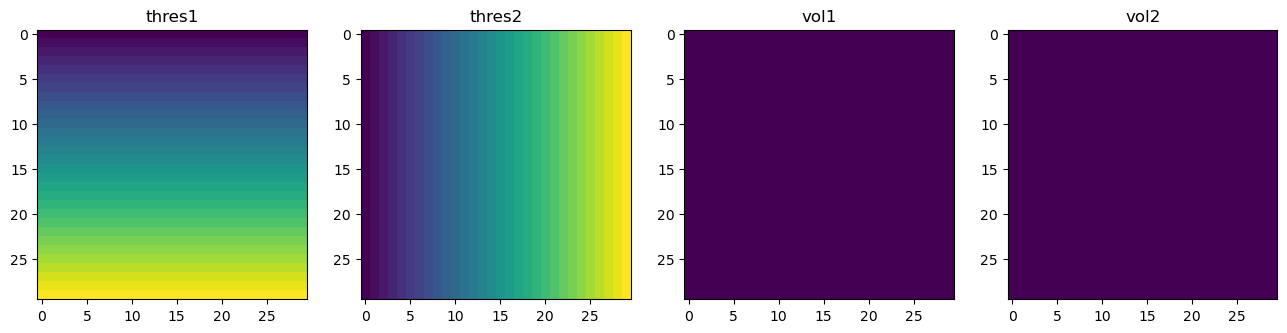

In [7]:
fig,axx=plt.subplots(1,4,figsize=(16,4))
#ax=axx[0]
for  i,(ax,title) in enumerate(zip(axx,["thres1","thres2","vol1","vol2"])):
    ax.imshow(arr_params2[2,15,:,:,i])
    ax.set_title(title)

In [8]:
%%time
arr = np.asarray([r[0] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_vol =np.asarray([r[0] for r in results ]).reshape( size,size,size,size)
arr_vol = np.transpose(arr_vol,axes=(2,3,0,1))
arr_vol = arr_vol.reshape(size**2,size**2)

CPU times: total: 219 ms
Wall time: 335 ms


ValueError: The number of FixedLocator locations (30), usually from a call to set_ticks, does not match the number of labels (60).

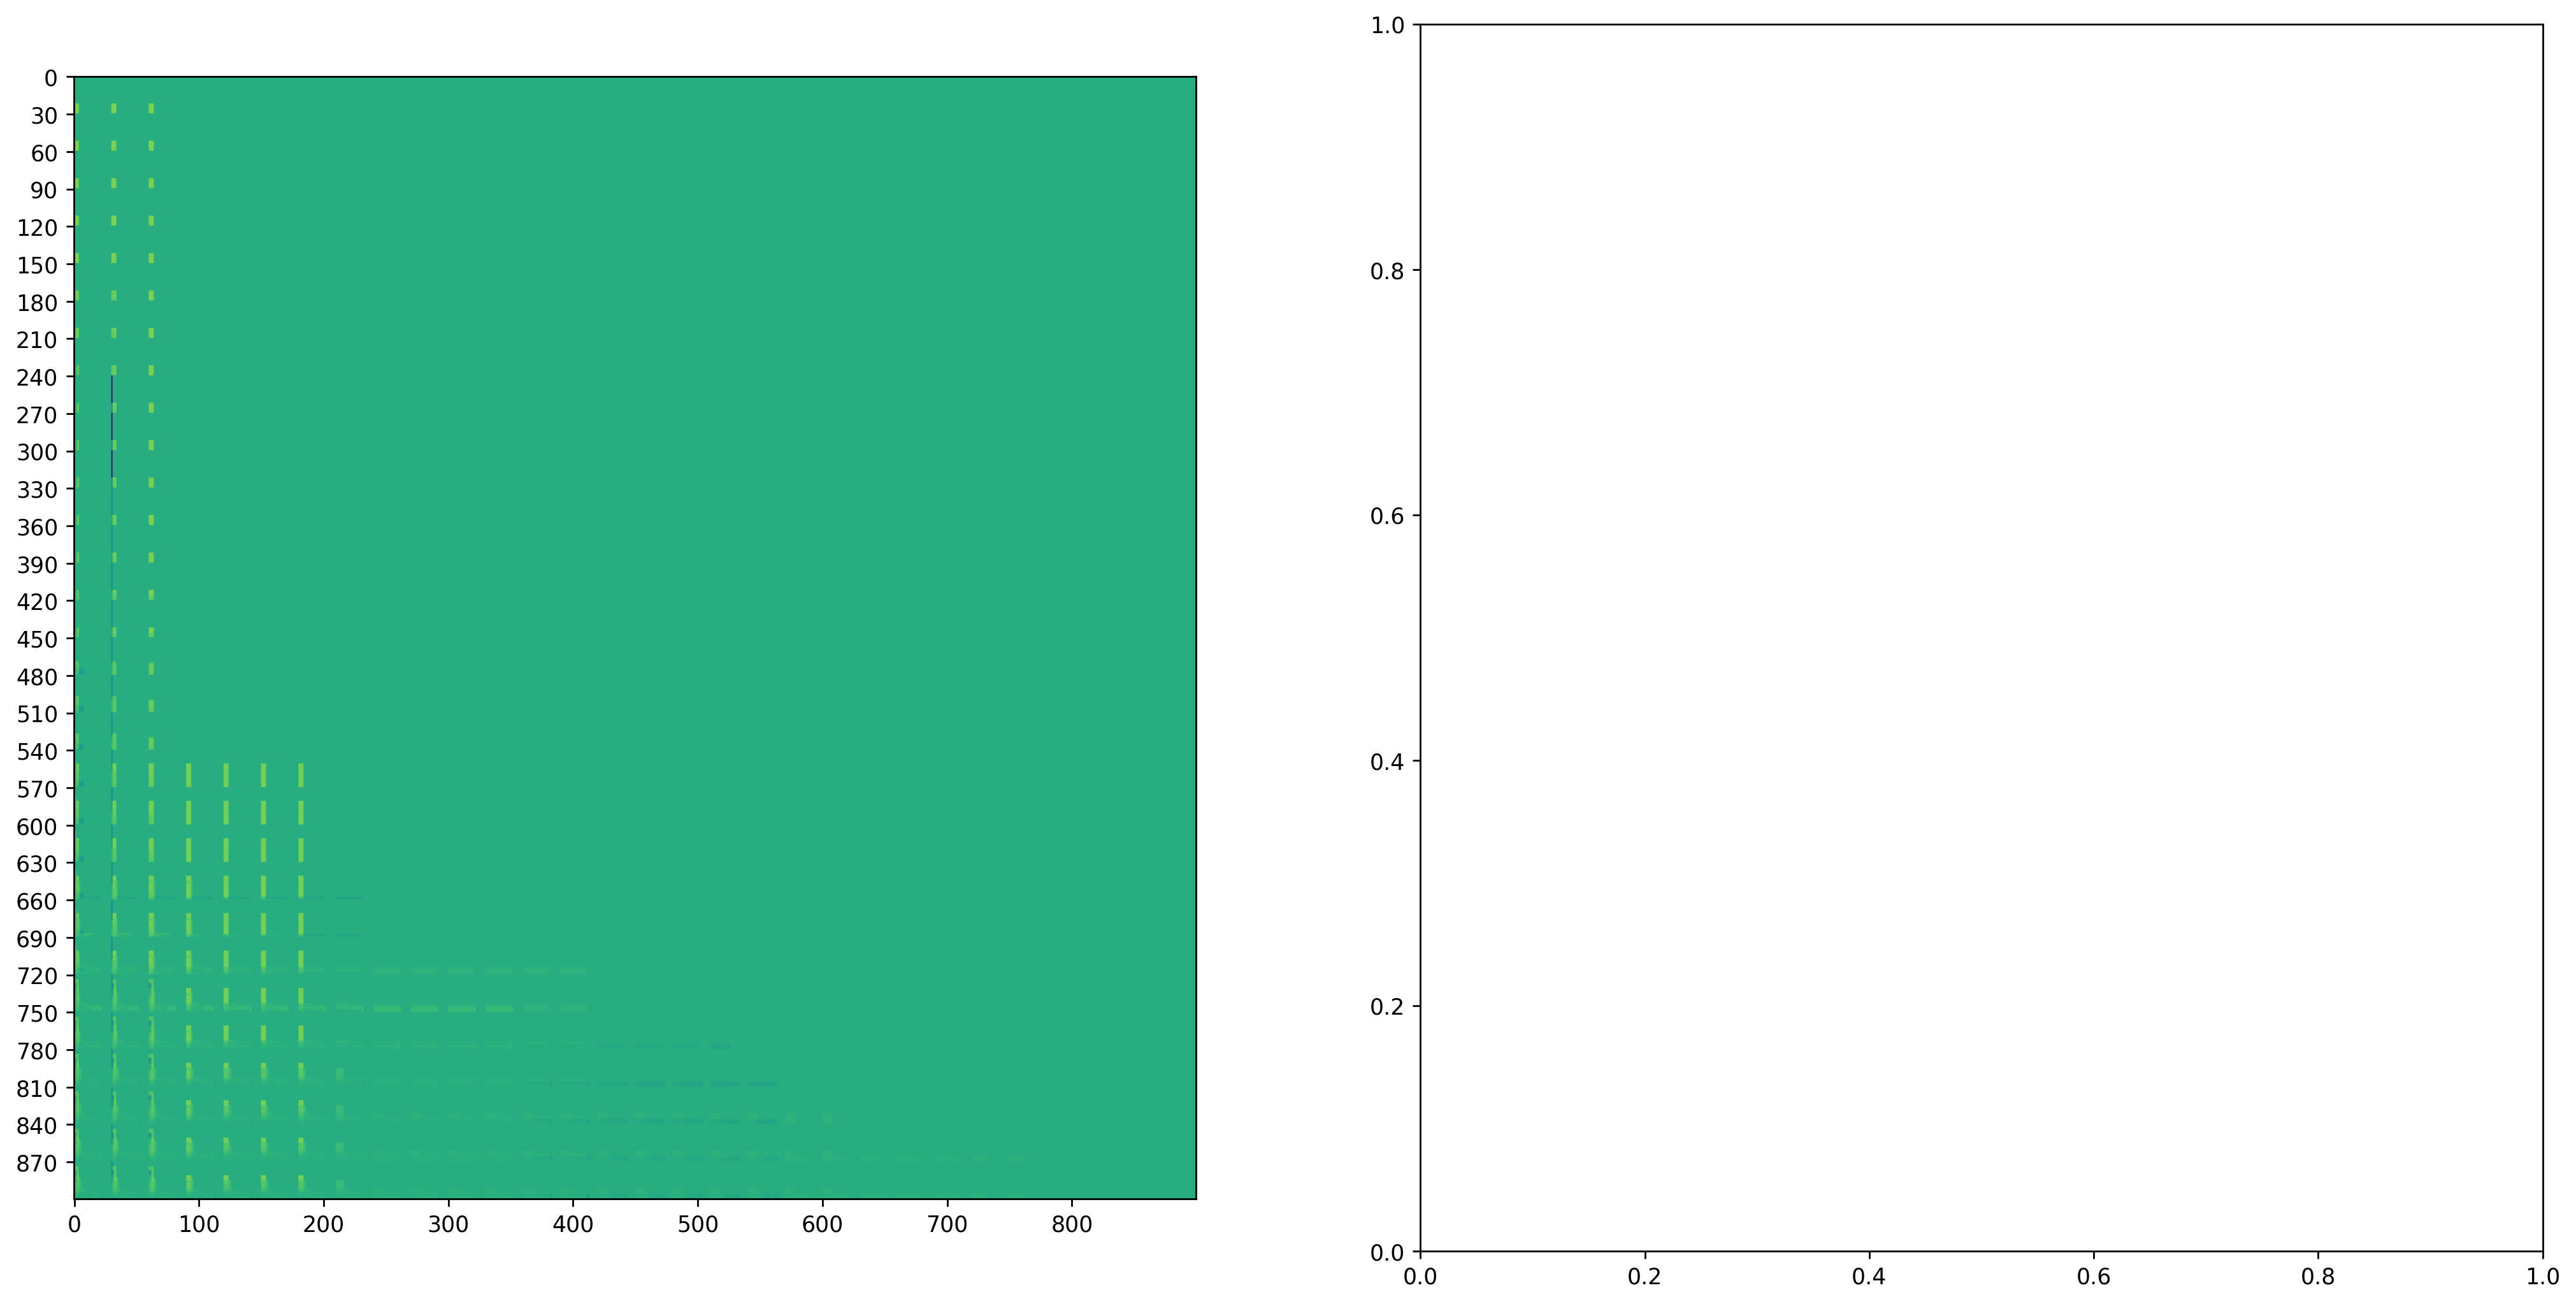

In [9]:
%%time
fig,axx=plt.subplots(1,2,dpi=250,figsize=(20,10))
ax=axx[0]
ax.imshow(arr,interpolation=None)
#ax.set_xlabel("change")

ax.set_yticks(np.arange(0,900,30));
yvals = sorted(set(arr_params[:,:,0].reshape(-1)))
ax.set_yticklabels([f"{y:.3f}" for y in yvals]);
ax.set_ylabel("threshold1")
ax.set_xticks(np.arange(0,900,30));
xvals = sorted(set(arr_params[:,:,1].reshape(-1)))
ax.set_xticklabels([f"{x:.3f}" for x in xvals],rotation=45);
ax.set_xlabel("threshold2")

ax=axx[1]
ax.imshow(arr_vol,interpolation=None)
#ax.set_xlabel("volume")

ax.set_yticks(np.arange(0,900,30));
yvals = sorted(set(arr_params[:,:,2].reshape(-1)))
ax.set_yticklabels([f"{y:.3g}" for y in yvals]);
ax.set_ylabel("volume1")
ax.set_xticks(np.arange(0,900,30));
xvals = sorted(set(arr_params[:,:,3].reshape(-1)))
ax.set_xticklabels([f"{x:.3g}" for x in xvals],rotation=45);
ax.set_xlabel("volume2")


In [10]:
arr_num_trades = np.asarray([r[2] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_std = np.asarray([np.std(r[3]) if r[3] else -99 for r in results ]).reshape( int(len(results)**0.5),-1)

In [11]:
row,col = np.where((arr>0.0041)& (arr<0.5)&(arr_num_trades>30)&(arr_num_trades<100))
row,col = np.where((arr>0.0041)& (arr>arr_std-0.0051)&(arr_num_trades>30)&(arr_num_trades<100))
#row,col = np.where(arr==0.016196886832141322)
result_locs = row*900+col
"num of params",len(result_locs),"trading period",55000/60/24,"days"

('num of params', 18, 'trading period', 38.19444444444444, 'days')

In [154]:
def get_winpercent(profits):
    return len(np.where((np.asarray(profits)-0.002)>0)[0])/len(profits)
order = np.argsort([np.std(results[r_loc][3]) for r_loc in result_locs])
order = np.argsort([-get_winpercent(results[r_loc][3]) for r_loc in result_locs])

for r_loc in result_locs[order]:
    print(results[r_loc][:3])
    profits=results[r_loc][3]
    winpercent=len(np.where((np.asarray(profits)-0.002)>0)[0])/len(profits)
    print(np.std(results[r_loc][3]),r_loc,winpercent)

(0.0047807405985210135, (-0.006896551724137931, -0.00862068965517241, 1000000.0, 2689655.1724137934), 32)
0.008362143397107365 696601 0.75
(0.005101609875356313, (-0.00862068965517241, -0.0017241379310344793, 1000000.0, 4379310.344827587), 34)
0.006575222073712926 673202 0.7352941176470589
(0.004399649752085526, (-0.00862068965517241, -0.0017241379310344793, 2689655.1724137934, 2689655.1724137934), 34)
0.007901081917477277 673231 0.7352941176470589
(0.005221165444285478, (-0.012068965517241376, -0.0017241379310344793, 1000000.0, 2689655.1724137934), 33)
0.006634064311929983 619201 0.7272727272727273
(0.005256525355261665, (-0.006896551724137931, -0.0017241379310344793, 2689655.1724137934, 4379310.344827587), 32)
0.005870046957301924 700232 0.71875
(0.004285265704094483, (-0.005172413793103445, -0.006896551724137931, 2689655.1724137934, 2689655.1724137934), 32)
0.008037629225144545 724531 0.71875
(0.00417464117800796, (-0.006896551724137931, -0.005172413793103445, 2689655.1724137934, 26

# low volume then high volume, -0% then -5%

# what are the win% of these? what are the number of trades?

params -0.00689655,-0.00862069,1000000.00000000,2689655.17241379


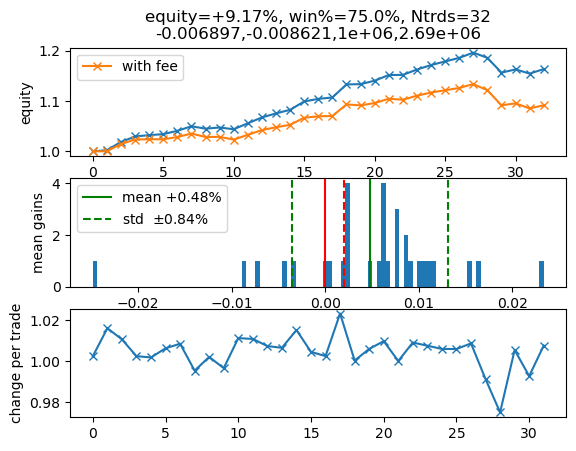

params -0.00862069,-0.00172414,1000000.00000000,4379310.34482759


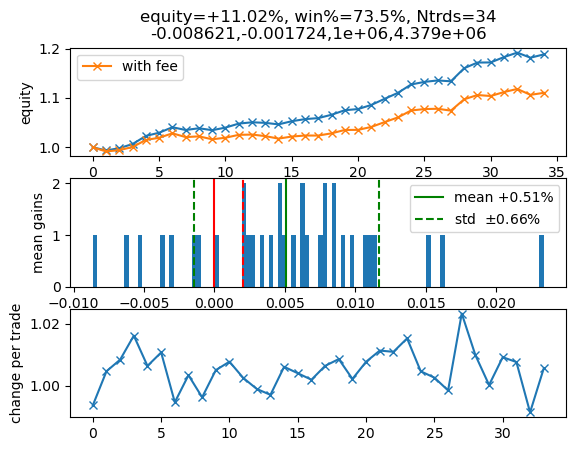

params -0.00862069,-0.00172414,2689655.17241379,2689655.17241379


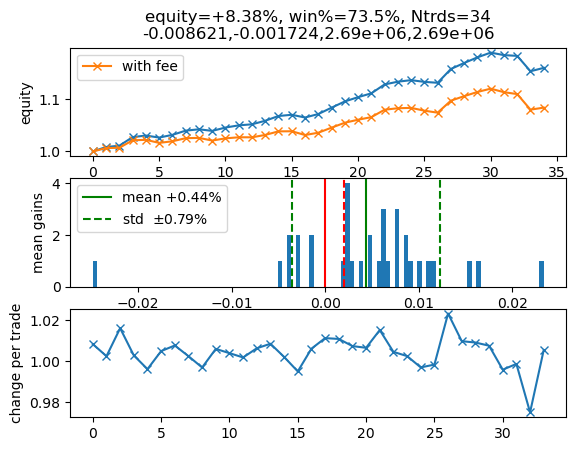

In [155]:
for r_loc in result_locs[order][:3]:
    print("params",",".join([f"{r:.8f}" for r in results[r_loc][1]]))
    fig,axx=plt.subplots(3,1,)
    profits = results[r_loc][3]#779432 #805532 
    winpercent=len(np.where((np.asarray(profits)-0.002)>0)[0])/len(profits)
    ax=axx[0]
    ax.set_ylabel("equity")
    equity = [1]
    equity_fee = [1]
    for p in profits:
        equity.append(equity[-1]*(1+p))
        equity_fee.append(equity_fee[-1]*(1+p-0.002))
    ax.plot(equity,"-x")
    ax.plot(equity_fee,"-x",label="with fee")
    ax.legend()
    strr=f"equity={equity_fee[-1]-1:+.2%}, win%={winpercent:.1%}, Ntrds={len(profits)}\n"
    strr+= ",".join([f"{r:.4g}" for r in results[r_loc][1]])
    ax.set_title(strr)

    ax=axx[1]
    ax.hist(profits,bins=100);
    ax.axvline(0.002,c="r",ls="--")
    ax.axvline(0.0,c="r")
    ax.axvline(np.mean(profits),c="g",label=f"mean {np.mean(profits):+.2%}")
    ax.axvline(np.mean(profits)+np.std(profits),c="g",ls="--",label=f"std  $\pm${np.std(profits):.2%}")
    ax.axvline(np.mean(profits)-np.std(profits),c="g",ls="--")
    ax.set_ylabel("mean gains")
    ax.legend()
    ax=axx[2]
    ax.plot(np.asarray(profits)+1,"-x")
    ax.set_ylabel("change per trade")
    plt.show()

# for the each param, find the times of the trades

In [31]:
with open("2_0_0_analysisdata/2_0_0dfmpl_list.pkl","rb")as f:
    dfmpl_list = pickle.load(f)

In [33]:
dfmpl_list[:2]

[(                       Open    High     Low   Close    Volume
  Date                                                         
  2023-03-31 10:49:00  0.1092  0.1093  0.1091  0.1093   72053.0
  2023-03-31 10:50:00  0.1092  0.1092  0.1089  0.1090   33803.0
  2023-03-31 10:51:00  0.1090  0.1092  0.1089  0.1089  186608.0
  2023-03-31 10:52:00  0.1089  0.1091  0.1089  0.1091  266905.0
  2023-03-31 10:53:00  0.1090  0.1092  0.1090  0.1090   91874.0
  ...                     ...     ...     ...     ...       ...
  2023-05-08 15:24:00  0.0898  0.0899  0.0898  0.0899   17013.0
  2023-05-08 15:25:00  0.0899  0.0899  0.0898  0.0898    6547.0
  2023-05-08 15:26:00  0.0899  0.0899  0.0899  0.0899     886.0
  2023-05-08 15:27:00  0.0899  0.0899  0.0899  0.0899    1750.0
  2023-05-08 15:28:00  0.0899  0.0899  0.0899  0.0899       0.0
  
  [55000 rows x 5 columns],
  'XLMUSDT',
  3),
 (                       Open    High     Low   Close     Volume
  Date                                               

In [34]:
def validate_df(loc, df_v, v0_thres, v1_thres):
    v0 = df_v[loc, 0] * df_v[loc, 4]
    v1 = df_v[loc + 1, 0] * df_v[loc + 1, 4]
    return v0 > v0_thres and v1 > v1_thres
def objective(params):
    threshold1, threshold2, v0_thres, v1_thres = params
    collated_data_list = []

    for dfmpl, _, _ in dfmpl_list:
        df_v = dfmpl.values
        changes = (df_v[:, 3] - df_v[:, 0]) / df_v[:, 0]
        a4_1 = np.logical_and(changes[1:] < threshold1, changes[:-1] < threshold2)
        locs = np.where(a4_1)[0]
        if locs.size > 0:
            chosen_locs = [loc for loc in locs if validate_df(loc, df_v, v0_thres, v1_thres)]
            if chosen_locs:
                collated_data = np.asarray([changes[loc:loc + 5] for loc in chosen_locs])
                collated_data_list.append(collated_data)

    collated_data = np.vstack(collated_data_list)
    mean_val = collated_data[:, 2].mean()
    return mean_val, params



In [139]:
%%time
top_params_to_use=1
all_trade_locs = [] 
for r_loc in result_locs[order][:top_params_to_use]:
    threshold1, threshold2, v0_thres, v1_thres = results[r_loc][1]
    collated_data_list = []
    trade_locs=[]
    for dfmpl, symb, _ in dfmpl_list:
        df_v = dfmpl.values
        changes = (df_v[:, 3] - df_v[:, 0]) / df_v[:, 0]
        a4_1 = np.logical_and(changes[1:] < threshold1, changes[:-1] < threshold2)
        locs = np.where(a4_1)[0]
        if locs.size > 0:
            chosen_locs = [loc for loc in locs if validate_df(loc, df_v, v0_thres, v1_thres)]
            if chosen_locs:
                [trade_locs.append((loc,symb)) for loc in chosen_locs]
                collated_data = np.asarray([changes[loc:loc + 5] for loc in chosen_locs])
                collated_data_list.append(collated_data)

    collated_data = np.vstack(collated_data_list)
    mean_val = collated_data[:, 2].mean()
    all_trade_locs.append(trade_locs)

CPU times: total: 46.9 ms
Wall time: 82 ms


In [140]:
mean_val,len(collated_data),len(trade_locs)

(0.0047807405985210135, 32, 32)

In [141]:
from collections import Counter
len(set([t for trade_locs in all_trade_locs for t,_ in trade_locs ]))

32

In [142]:
all_trade_locs = []
profits=[]
trade_loc_list=[]
for r_loc in result_locs[order][:top_params_to_use]:
    threshold1, threshold2, v0_thres, v1_thres = results[r_loc][1] 
    collated_data_list = []
    trade_locs=[]
    for dfmpl, symb, _ in dfmpl_list:
        df_v = dfmpl.values
        changes = (df_v[:, 3] - df_v[:, 0]) / df_v[:, 0]
        a4_1 = np.logical_and(changes[1:] < threshold1, changes[:-1] < threshold2)
        locs = np.where(a4_1)[0]
        if locs.size > 0:
            chosen_locs = [loc for loc in locs if validate_df(loc, df_v, v0_thres, v1_thres)]
            if chosen_locs:
                [trade_locs.append(f"{loc}_{symb}") for loc in chosen_locs]
                collated_data = np.asarray([changes[loc:loc + 5] for loc in chosen_locs])
                collated_data_list.append(collated_data)

    collated_data = np.vstack(collated_data_list)
    mean_val = collated_data[:, 2].mean()
    all_trade_locs.append(trade_locs)
    for tl,cd in zip(trade_locs,collated_data[:, 2]):
        if tl not in trade_loc_list:
            profits.append(cd)
            trade_loc_list.append(tl)

In [143]:
len(trade_loc_list)

32

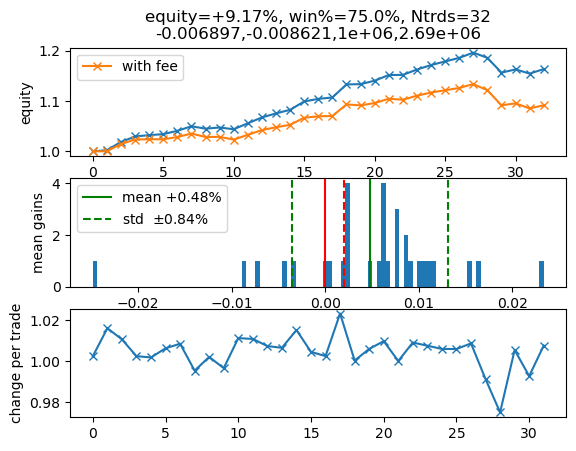

In [144]:
#for r_loc in result_locs[order][:10]:
fig,axx=plt.subplots(3,1,)
#profits = results[r_loc][3]#779432 #805532 
winpercent=len(np.where((np.asarray(profits)-0.002)>0)[0])/len(profits)
ax=axx[0]
ax.set_ylabel("equity")
equity = [1]
equity_fee = [1]
for p in profits:
    equity.append(equity[-1]*(1+p))
    equity_fee.append(equity_fee[-1]*(1+p-0.002))
ax.plot(equity,"-x")
ax.plot(equity_fee,"-x",label="with fee")
ax.legend()
strr=f"equity={equity_fee[-1]-1:+.2%}, win%={winpercent:.1%}, Ntrds={len(profits)}\n"
strr+= ",".join([f"{r:.4g}" for r in results[r_loc][1]])
ax.set_title(strr)

ax=axx[1]
ax.hist(profits,bins=100);
ax.axvline(0.002,c="r",ls="--")
ax.axvline(0.0,c="r")
ax.axvline(np.mean(profits),c="g",label=f"mean {np.mean(profits):+.2%}")
ax.axvline(np.mean(profits)+np.std(profits),c="g",ls="--",label=f"std  $\pm${np.std(profits):.2%}")
ax.axvline(np.mean(profits)-np.std(profits),c="g",ls="--")
ax.set_ylabel("mean gains")
ax.legend()
ax=axx[2]
ax.plot(np.asarray(profits)+1,"-x")
ax.set_ylabel("change per trade")
plt.show()

In [26]:
%%time
arr = np.asarray([r[2] for r in results ]).reshape( int(len(results)**0.5),-1)
arr_vol =np.asarray([r[2] for r in results ]).reshape( size,size,size,size)
arr_vol = np.transpose(arr_vol,axes=(2,3,0,1))
arr_vol = arr_vol.reshape(size**2,size**2)

CPU times: total: 109 ms
Wall time: 250 ms


CPU times: total: 46.9 ms
Wall time: 74.1 ms


Text(0.5, 0, '(counts) volume')

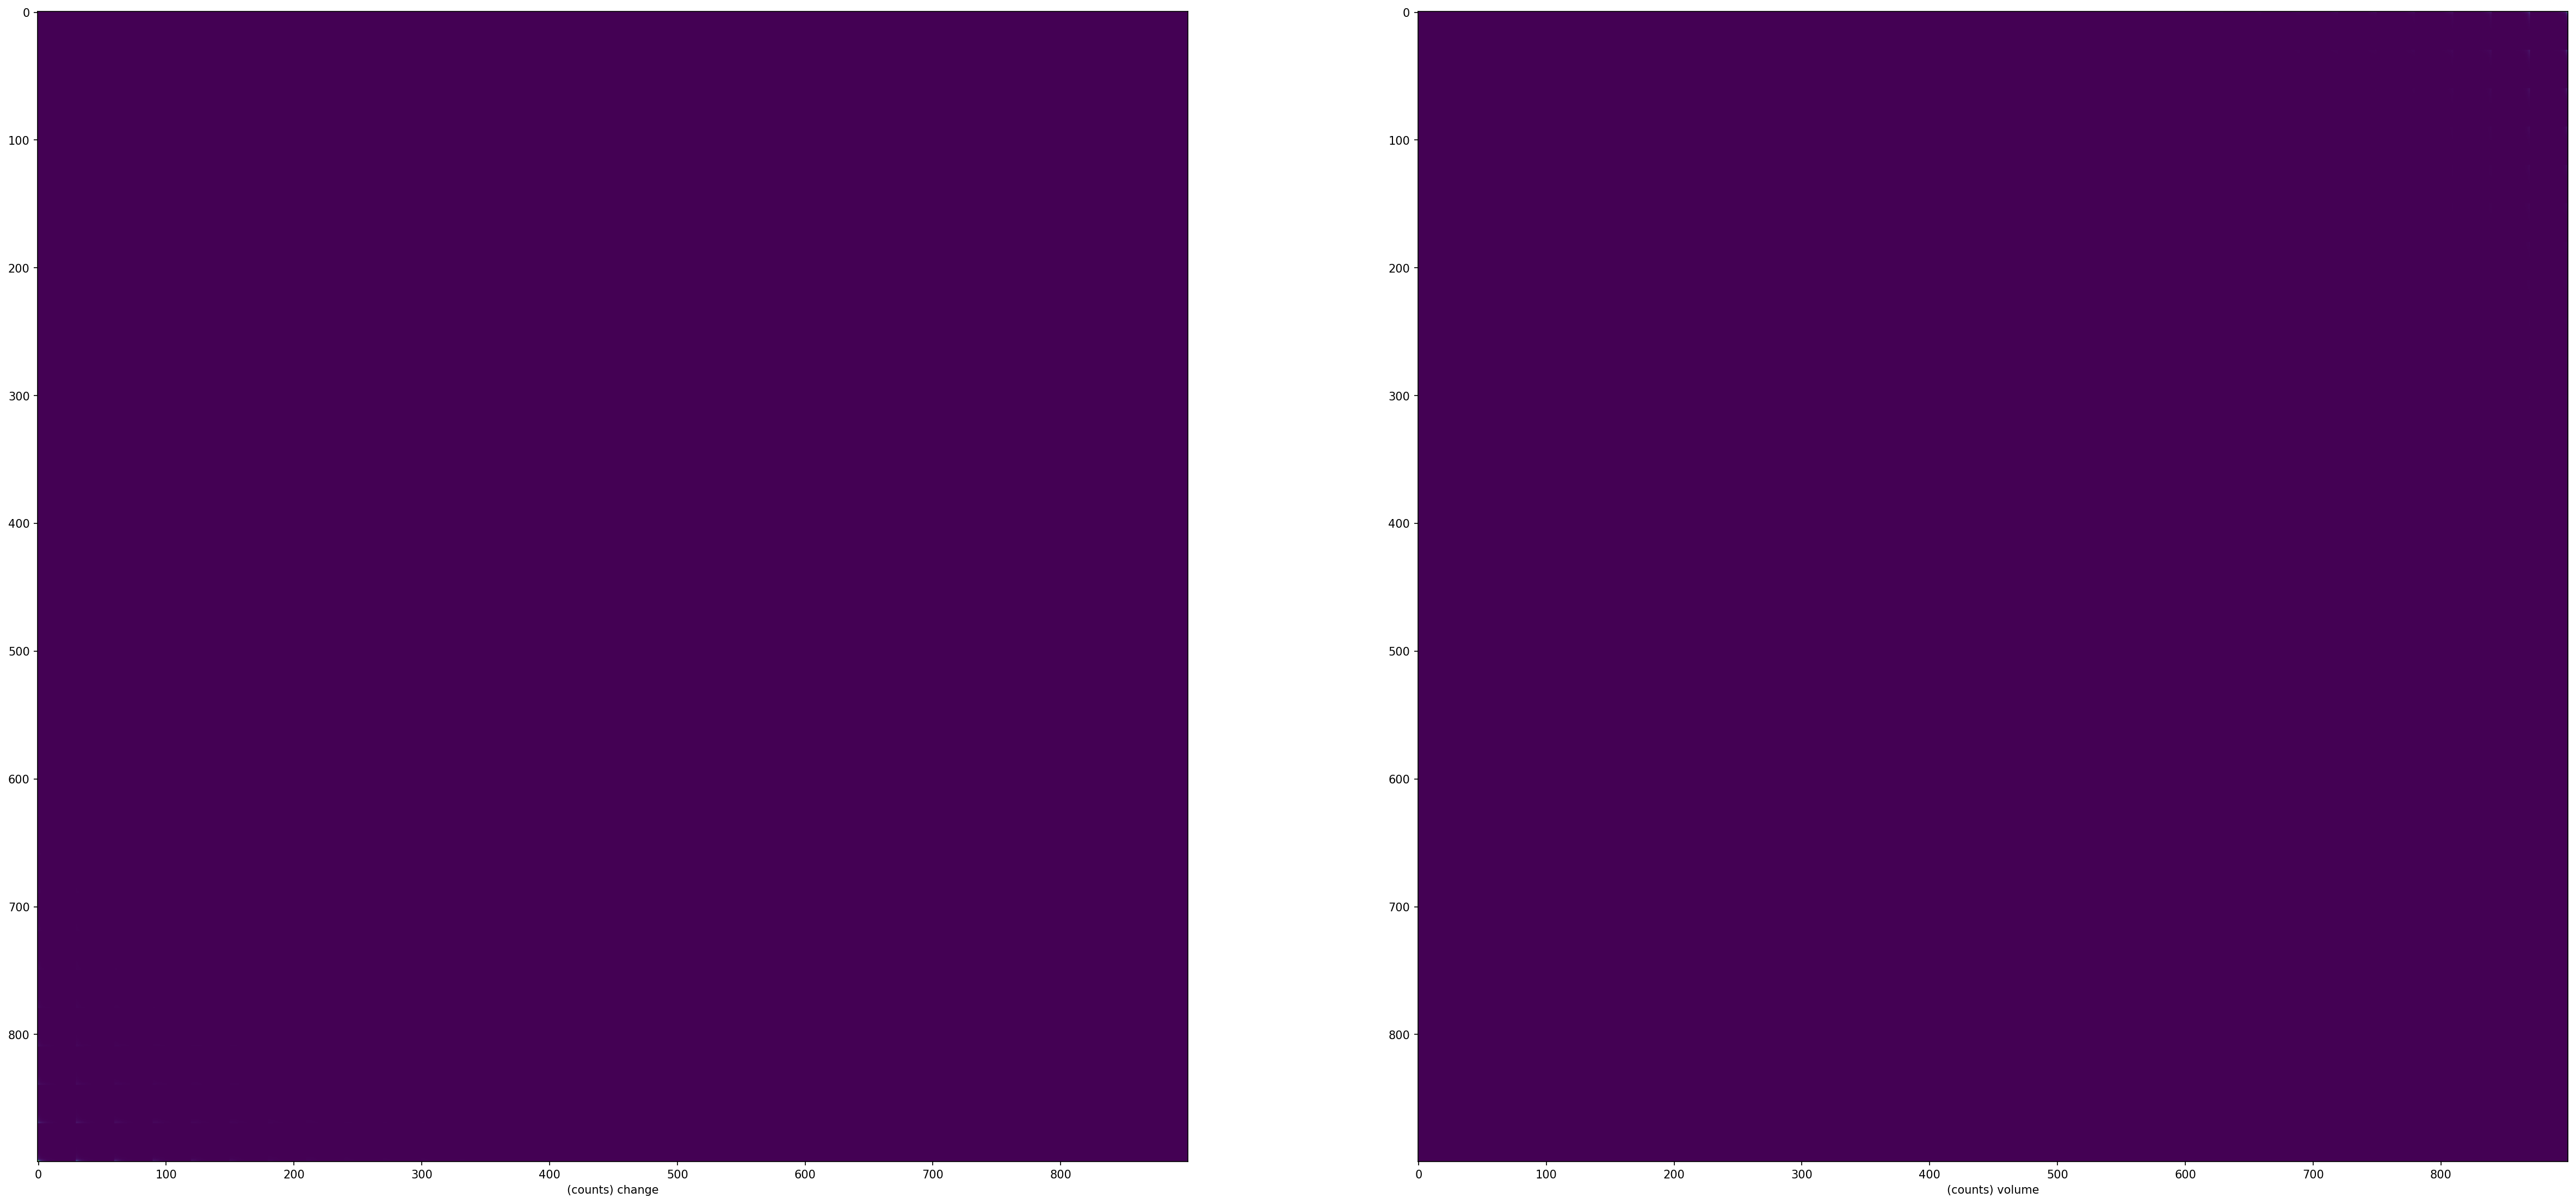

In [27]:
%%time
fig,axx=plt.subplots(1,2,dpi=150,figsize=(40,20))
axx[0].imshow(arr,interpolation=None)
axx[0].set_xlabel("(counts) change")
axx[1].imshow(arr_vol,interpolation=None)
axx[1].set_xlabel("(counts) volume")

Text(0.5, 1.0, 'trades')

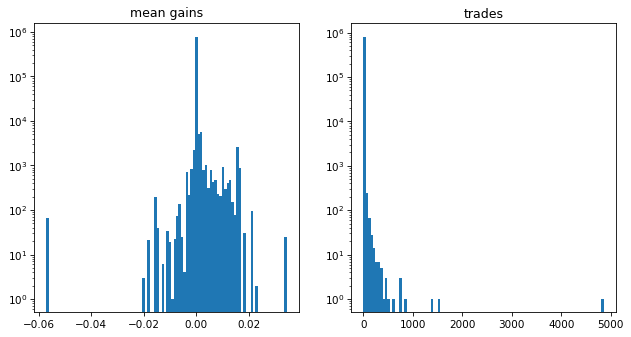

In [34]:
fig,axx =plt.subplots(1,2,figsize=(10,5),dpi=75)
axx[0].hist(np.asarray([r[0] for r in results ]),bins=100);
axx[0].set_yscale("log")
axx[0].set_title("mean gains")
axx[1].hist(np.asarray([r[2] for r in results ]),bins=100);
axx[1].set_yscale("log")
axx[1].set_title("trades")

Text(0, 0.5, 'counts')

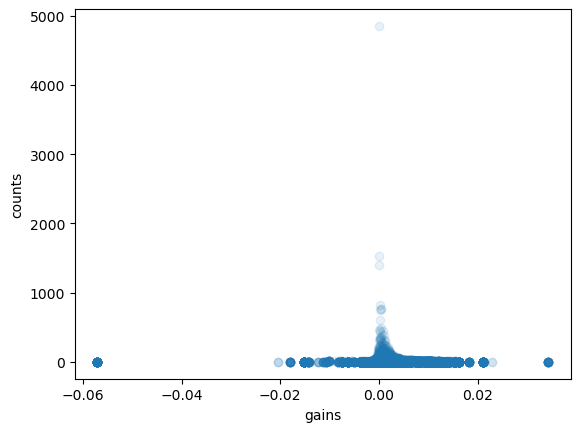

In [36]:
%%time
plt.scatter([r[0] for r in results ],[r[2] for r in results ],alpha=0.1)
plt.xlabel("gains")
plt.ylabel("counts")